In [1]:
# Import Required Libraries

import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Make sure dotenv is loaded
load_dotenv()

True

In [3]:
# Create Alpaca key variables to call from .env() file
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

display(type(alpaca_api_key))
display(type(alpaca_secret_key))

str

str

In [4]:
# Create our Alpaca REST object
alpaca = tradeapi.REST(
  alpaca_api_key,
  alpaca_secret_key,
  api_version="v2"
)

alpaca

In [5]:
# Set the start and end dates for the information we want to pull from Alpaca
start_date = pd.Timestamp("2018-01-02", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-11-02", tz="America/New_York").isoformat()

In [14]:
# Set the list of tickers we want the Alpaca request to fetch
tickers = ["VOO", "MSFT", "AAPL", "BND", "AMT", "VUG", "TSLA", "AMZN", "EDV", "PLD"]

In [15]:
# Set the timeframe of collection. We just need the a daily price point
timeframe = "1D"

In [16]:
# Create the request of the data to fetch via the Alpaca SDK
diversified_prices_df = alpaca.get_barset(
  tickers,
  timeframe,
  limit=1000,
  start=start_date,
  end=end_date
).df

diversified_prices_df

AAPL                                          \
                              open     high       low     close     volume   
time                                                                         
2018-01-02 00:00:00-05:00  170.160  172.300  169.2600  172.2600   20523941   
2018-01-03 00:00:00-05:00  172.530  174.550  171.9600  172.1800   23193409   
2018-01-04 00:00:00-05:00  172.540  173.470  172.0800  173.0200   17742231   
2018-01-05 00:00:00-05:00  173.440  175.370  173.0500  174.9600   18402859   
2018-01-08 00:00:00-05:00  174.310  175.610  173.9300  174.3400   15554212   
...                            ...      ...       ...       ...        ...   
2021-10-27 00:00:00-04:00  149.380  149.730  148.4900  148.8500   43068962   
2021-10-28 00:00:00-04:00  149.860  153.165  149.7200  152.4766   77772052   
2021-10-29 00:00:00-04:00  147.190  149.940  146.4128  149.8000  104258290   
2021-11-01 00:00:00-04:00  148.985  149.700  147.8000  148.9900   57758481   
2021-11-02 00:00:00-04:00  148.670  151.570  148.6500  150.0000   61741508   

                              AMT                                      ...  \
                             open    high     low    close     volume  ...   
time                                                                   ...   
2018-01-02 00:00:00-05:00  143.11  143.22  140.91  141.105  1391810.0  ...   
2018-01-03 00:00:00-05:00  141.05  142.50  140.86  141.570  1210542.0  ...   
2018-01-04 00:00:00-05:00  141.44  141.96  139.58  139.630  1037487.0  ...   
2018-01-05 00:00:00-05:00  140.23  140.70  139.59  140.490  1363577.0  ...   
2018-01-08 00:00:00-05:00  140.66  143.24  140.66  142.030  1350838.0  ...   
...                           ...     ...     ...      ...        ...  ...   
2021-10-27 00:00:00-04:00  288.22  291.17  285.31  285.380  1074165.0  ...   
2021-10-28 00:00:00-04:00  285.50  289.99  282.85  286.040  1162672.0  ...   
2021-10-29 00:00:00-04:00  284.23  284.93  279.64  281.710  1510135.0  ...   
2021-11-01 00:00:00-04:00  282.83  283.16  276.41  282.120  1197575.0  ...   
2021-11-02 00:00:00-04:00  282.81  285.29  279.51  282.650  1300858.0  ...   

                              VOO                                       \
                             open     high       low    close   volume   
time                                                                     
2018-01-02 00:00:00-05:00  246.15  247.030  245.7361  247.030  2235294   
2018-01-03 00:00:00-05:00  247.19  248.700  247.1800  248.560  2354148   
2018-01-04 00:00:00-05:00  249.27  250.120  249.1700  249.630  2314943   
2018-01-05 00:00:00-05:00  250.46  251.400  249.9500  251.250  1752711   
2018-01-08 00:00:00-05:00  251.16  251.880  250.8700  251.720  1929560   
...                           ...      ...       ...      ...      ...   
2021-10-27 00:00:00-04:00  419.66  420.290  417.2800  417.290  2684049   
2021-10-28 00:00:00-04:00  418.78  421.440  418.7500  421.315  3139789   
2021-10-29 00:00:00-04:00  419.15  422.515  418.8700  422.140  3983364   
2021-11-01 00:00:00-04:00  423.19  423.570  421.2800  423.010  3544932   
2021-11-02 00:00:00-04:00  423.15  424.960  423.0100  424.650  2754466   

                              VUG                                        
                             open     high       low   close     volume  
time                                                                     
2018-01-02 00:00:00-05:00  141.29  142.270  141.0524  142.25   984355.0  
2018-01-03 00:00:00-05:00  142.40  143.660  142.4000  143.56   653690.0  
2018-01-04 00:00:00-05:00  144.07  144.300  143.8548  143.95   703928.0  
2018-01-05 00:00:00-05:00  144.37  145.240  144.2899  145.20  1061025.0  
2018-01-08 00:00:00-05:00  145.12  145.730  145.0800  145.62   683662.0  
...                           ...      ...       ...     ...        ...  
2021-10-27 00:00:00-04:00  310.15  312.292  309.5439  309.57   571689.0  
2021-10-28 00:00:00-04:00  310.99  312.780  310.4500  312.68   7936

In [17]:
# Create a new empty DF that that holds only the closing prices of each stock
diversified_closing_prices_df = pd.DataFrame()

In [18]:
# Using a for loop, for every ticker in the tickers list, select only the close price for each ticker in the prices_df DF
for ticker in tickers:
  diversified_closing_prices_df[ticker] = diversified_prices_df[ticker]["close"]

diversified_closing_prices_df

,VOO,MSFT,AAPL,BND,AMT,VUG,TSLA,AMZN,EDV,PLD
time,,,,,,,,,,
2018-01-02 00:00:00-05:00,247.030,85.91,172.2600,81.3200,141.105,142.25,320.29,1189.000,117.500,64.01
2018-01-03 00:00:00-05:00,248.560,86.33,172.1800,81.4000,141.570,143.56,317.01,1202.740,119.690,63.86
2018-01-04 00:00:00-05:00,249.630,87.12,173.0200,81.3500,139.630,143.95,314.62,1209.640,119.940,62.63
2018-01-05 00:00:00-05:00,251.250,88.11,174.9600,81.2400,140.490,145.20,316.55,1229.070,119.420,62.56
2018-01-08 00:00:00-05:00,251.720,88.22,174.3400,81.2600,142.030,145.62,336.41,1246.950,119.300,63.29
...,...,...,...,...,...,...,...,...,...,...
2021-10-27 00:00:00-04:00,417.290,323.14,148.8500,85.4800,285.380,309.57,1038.00,3393.325,139.975,143.86
2021-10-28 00:00:00-04:00,421.315,324.32,152.4766,85.3600,286.040,312.68,1077.09,3444.500,139.320,146.66
2021-10-29 00:00:00-04:00,422.140,331.64,149.8000,85.3399,281.710,314.19,1114.18,3372.430,139.560,144.86


In [19]:
# Calculate the daily returns for each of the stocks in the portfolio
diversified_daily_returns_df = diversified_closing_prices_df.pct_change().dropna()
diversified_daily_returns_df

,VOO,MSFT,AAPL,BND,AMT,VUG,TSLA,AMZN,EDV,PLD
time,,,,,,,,,,
2018-01-03 00:00:00-05:00,0.006194,0.004889,-0.000464,0.000984,0.003295,0.009209,-0.010241,0.011556,0.018638,-0.002343
2018-01-04 00:00:00-05:00,0.004305,0.009151,0.004879,-0.000614,-0.013703,0.002717,-0.007539,0.005737,0.002089,-0.019261
2018-01-05 00:00:00-05:00,0.006490,0.011364,0.011213,-0.001352,0.006159,0.008684,0.006134,0.016063,-0.004336,-0.001118
2018-01-08 00:00:00-05:00,0.001871,0.001248,-0.003544,0.000246,0.010962,0.002893,0.062739,0.014548,-0.001005,0.011669
2018-01-09 00:00:00-05:00,0.002225,0.000113,-0.000057,-0.002892,-0.007393,0.002129,-0.008085,0.004948,-0.033697,-0.009954
...,...,...,...,...,...,...,...,...,...,...
2021-10-27 00:00:00-04:00,-0.004580,0.043363,-0.002747,0.003876,-0.005402,0.000711,0.019586,0.005165,0.024482,-0.016342
2021-10-28 00:00:00-04:00,0.009646,0.003652,0.024364,-0.001404,0.002313,0.010046,0.037659,0.015081,-0.004679,0.019463
2021-10-29 00:00:00-04:00,0.001958,0.022570,-0.017554,-0.000235,-0.015138,0.004829,0.034435,-0.020923,0.001723,-0.012273


In [20]:
# Calculate cumulative returns for the stocks portfolio
diversified_cumulative_returns_df = (1 + diversified_daily_returns_df).cumprod() - 1
diversified_cumulative_returns_df

,VOO,MSFT,AAPL,BND,AMT,VUG,TSLA,AMZN,EDV,PLD
time,,,,,,,,,,
2018-01-03 00:00:00-05:00,0.006194,0.004889,-0.000464,0.000984,0.003295,0.009209,-0.010241,0.011556,0.018638,-0.002343
2018-01-04 00:00:00-05:00,0.010525,0.014085,0.004412,0.000369,-0.010453,0.011951,-0.017703,0.017359,0.020766,-0.021559
2018-01-05 00:00:00-05:00,0.017083,0.025608,0.015674,-0.000984,-0.004358,0.020738,-0.011677,0.033701,0.016340,-0.022653
2018-01-08 00:00:00-05:00,0.018986,0.026889,0.012075,-0.000738,0.006555,0.023691,0.050329,0.048738,0.015319,-0.011248
2018-01-09 00:00:00-05:00,0.021252,0.027005,0.012017,-0.003628,-0.000886,0.025870,0.041837,0.053928,-0.018894,-0.021090
...,...,...,...,...,...,...,...,...,...,...
2021-10-27 00:00:00-04:00,0.689228,2.761378,-0.135899,0.051156,1.022466,1.176239,2.240813,1.853932,0.191277,1.247461
2021-10-28 00:00:00-04:00,0.705522,2.775113,-0.114846,0.049680,1.027143,1.198102,2.362859,1.896972,0.185702,1.291204
2021-10-29 00:00:00-04:00,0.708861,2.860319,-0.130384,0.049433,0.996457,1.208717,2.478660,1.836358,0.187745,1.263084


<AxesSubplot:title={'center':'Daily Returns - Diversified Portfolio (Jan. 2018 - Nov. 2021)'}, xlabel='time'>

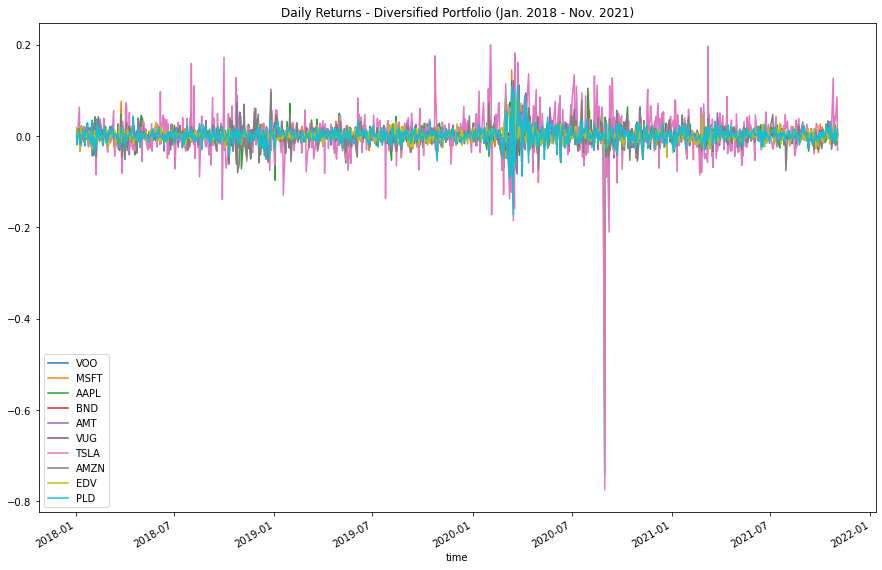

In [21]:
# Plot daily returns for the Diversified Portfolio
diversified_daily_returns_df.plot(figsize=(15,10), title="Daily Returns - Diversified Portfolio (Jan. 2018 - Nov. 2021)")

<AxesSubplot:title={'center':'Cumulative Returns - Diversified Portfolio (Jan. 2018 - Nov. 2021)'}, xlabel='time'>

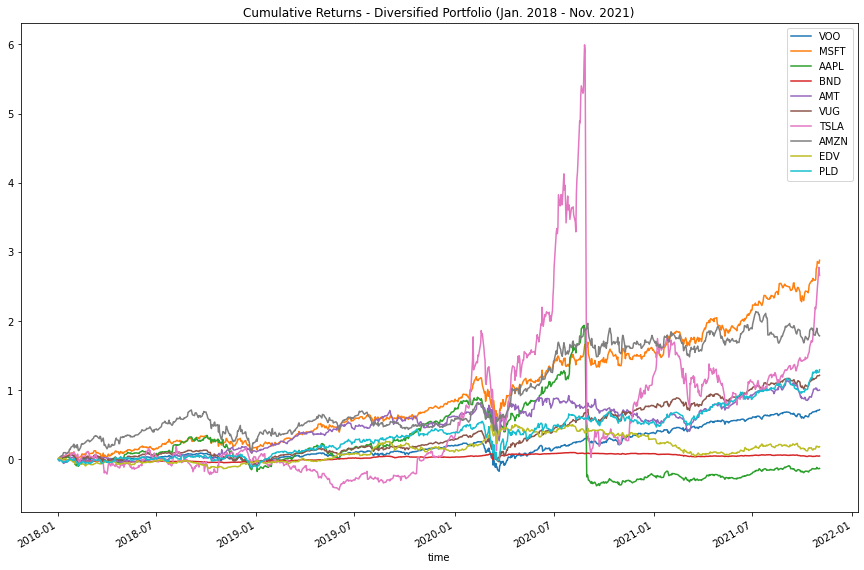

In [22]:
# Plot the cumulative returns for the Diversified Portfolio
diversified_cumulative_returns_df.plot(figsize=(15,10), title="Cumulative Returns - Diversified Portfolio (Jan. 2018 - Nov. 2021)")

In [23]:
# Set up Monte Carlo Simulation for the Diversified Portfoliofor a 5 year time period with a $10,000 initial investment
MC_diversified_five_year = MCSimulation(
  portfolio_data=diversified_prices_df,
  weights=[.1, .1, .1, .1, .1, .1, .1, .1, .1, .1],
  num_simulation=1000,
  num_trading_days=252 * 5
)

MC_diversified_five_year.portfolio_data.head()

AAPL                                    \
                             open    high     low   close    volume   
time                                                                  
2018-01-02 00:00:00-05:00  170.16  172.30  169.26  172.26  20523941   
2018-01-03 00:00:00-05:00  172.53  174.55  171.96  172.18  23193409   
2018-01-04 00:00:00-05:00  172.54  173.47  172.08  173.02  17742231   
2018-01-05 00:00:00-05:00  173.44  175.37  173.05  174.96  18402859   
2018-01-08 00:00:00-05:00  174.31  175.61  173.93  174.34  15554212   

                                           AMT                           ...  \
                          daily_return    open    high     low    close  ...   
time                                                                     ...   
2018-01-02 00:00:00-05:00          NaN  143.11  143.22  140.91  141.105  ...   
2018-01-03 00:00:00-05:00    -0.000464  141.05  142.50  140.86  141.570  ...   
2018-01-04 00:00:00-05:00     0.004879  141.44  141.96  139.58  139.630  ...   
2018-01-05 00:00:00-05:00     0.011213  140.23  140.70  139.59  140.490  ...   
2018-01-08 00:00:00-05:00    -0.003544  140.66  143.24  140.66  142.030  ...   

                                VOO                                   VUG  \
                                low   close   volume daily_return    open   
time                                                                        
2018-01-02 00:00:00-05:00  245.7361  247.03  2235294          NaN  141.29   
2018-01-03 00:00:00-05:00  247.1800  248.56  2354148     0.006194  142.40   
2018-01-04 00:00:00-05:00  249.1700  249.63  2314943     0.004305  144.07   
2018-01-05 00:00:00-05:00  249.9500  251.25  1752711     0.006490  144.37   
2018-01-08 00:00:00-05:00  250.8700  251.72  1929560     0.001871  145.12   

                                                                             
                             high       low   close     volume daily_return  
time                                                                         
2018-01-02 00:00:00-05:00  142.27  141.0524  142.25   984355.0          NaN  
2018-01-03 00:00:00-05:00  143.66  142.4000  143.56   653690.0     0.009209  
2018-01-04 00:00:00-05:00  144.30  143.8548  143.95   703928.0     0.002717  
2018-01-05 00:00:00-05:00  145.24  144.2899  145.20  1061025.0     0.008684  
2018-01-08 00:00:00-05:00  145.73  145.0800  145.62   683662.0     0.002893  

[5 rows x 60 columns]

In [24]:
# Run the Monte Carlo simulation to forecast 5 years cumulative returns for the Diversified Portfolio
MC_diversified_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007003,0.990695,1.016946,1.005969,0.992872,1.013433,1.006761,0.990123,1.002049,1.011545,...,0.989090,1.004042,1.003545,0.996320,0.997944,0.998960,1.014365,1.019381,0.999877,0.997487
2,1.004833,0.998472,1.013503,1.011582,0.990597,1.012555,1.006518,0.986968,1.001098,1.017969,...,0.993345,1.018795,0.996829,0.978173,1.004773,1.003416,1.016319,1.032464,1.012322,1.005259
3,1.005570,1.001144,1.006450,1.013349,0.998520,1.010779,1.003467,0.978263,1.008367,1.019040,...,0.993354,1.019762,0.995079,0.988073,1.010287,1.006375,1.015465,1.023292,1.021332,0.993628
4,1.002575,1.001780,1.017255,1.011190,0.992942,1.018144,0.994077,0.971869,1.007642,1.026814,...,1.011571,1.037690,0.998049,0.999522,1.013739,1.000275,1.016692,1.017646,1.008780,1.001641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.828444,2.241067,4.175279,3.097774,3.646880,3.325229,3.130277,4.780563,3.386049,2.793574,...,2.616260,4.223548,3.490595,4.180893,4.036930,5.201752,3.561293,3.065307,2.719231,3.055373
1257,2.814482,2.222219,4.181822,3.081561,3.641862,3.351339,3.116823,4.771660,3.361898,2.784786,...,2.603511,4.266773,3.460364,4.187607,4.007296,5.160266,3.580048,3.052300,2.723818,3.072739
1258,2.846582,2.219340,4.246623,3.075463,3.584739,3.376928,3.086047,4.783496,3.369349,2.733173,...,2.605764,4.267476,3.446185,4.219202,4.019262,5.112962,3.549175,3.060968,2.731737,3.041173
1259,2.853031,2.217523,4.238272,3.079561,3.563114,3.354192,3.115038,4.820887,3.371679,2.772144,...,2.592648,4.264347,3.421133,4.179941,4.045677,5.089139,3.547239,3.085193,2.715383,3.030989


<AxesSubplot:title={'center':'1000 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

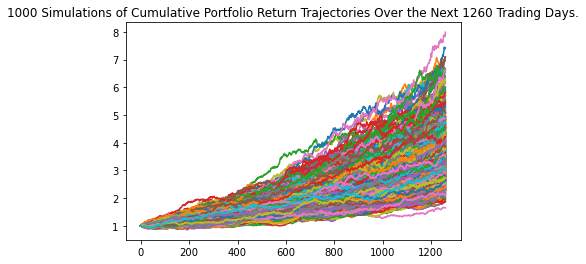

In [25]:
# Visualize the 5-year Monte Carlo simulation by creating an overlay line plot for the Diversified Portfolio
MC_diversified_five_year.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 1000 Simulations'}, ylabel='Frequency'>

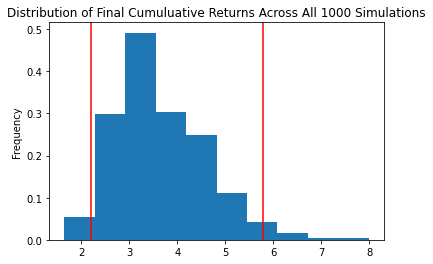

In [26]:
# Visualize the probability distribution of the 5-year Monte Carlo simulation by plotting a histogram for the Diversified Portfolio
MC_diversified_five_year.plot_distribution()

In [27]:
# Generate summary statistics from the 5-year Monte Carlo simulation results for the Diversified Portfolio
# Save the results as a variable
MC_diversified_five_year_summary_statistics = MC_diversified_five_year.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
print(MC_diversified_five_year_summary_statistics)

count           1000.000000
mean               3.635027
std                0.937276
min                1.644977
25%                2.960938
50%                3.479598
75%                4.255002
max                7.988693
95% CI Lower       2.190499
95% CI Upper       5.793566
Name: 1260, dtype: float64


In [28]:
# Calculate the confidence index lower and upper projections for a $10,000 initial investment in the Diversified Portfolio
diversified_five_year_lower_ci = round(MC_diversified_five_year_summary_statistics[8]*10000, 2)
diversified_five_year_upper_ci = round(MC_diversified_five_year_summary_statistics[9]*10000, 2)

print(f"With a 95% confidence interval, an initial investment of $10,000 in our Stocks Portfolio for 5 years, will be in the range of ${diversified_five_year_lower_ci} and ${diversified_five_year_upper_ci}")

With a 95% confidence interval, an initial investment of $10,000 in our Stocks Portfolio for 5 years, will be in the range of $21904.99 and $57935.66


In [29]:
# Set up Monte Carlo Simulation for a 10 year time period with a $10,000 initial investment in our Diversified Portfolio
MC_diversified_ten_year = MCSimulation(
  portfolio_data=diversified_prices_df,
  weights=[.1, .1, .1, .1, .1, .1, .1, .1, .1, .1],
  num_simulation=1000,
  num_trading_days=252 * 10
)

MC_diversified_ten_year.portfolio_data.head()

AAPL                                    \
                             open    high     low   close    volume   
time                                                                  
2018-01-02 00:00:00-05:00  170.16  172.30  169.26  172.26  20523941   
2018-01-03 00:00:00-05:00  172.53  174.55  171.96  172.18  23193409   
2018-01-04 00:00:00-05:00  172.54  173.47  172.08  173.02  17742231   
2018-01-05 00:00:00-05:00  173.44  175.37  173.05  174.96  18402859   
2018-01-08 00:00:00-05:00  174.31  175.61  173.93  174.34  15554212   

                                           AMT                           ...  \
                          daily_return    open    high     low    close  ...   
time                                                                     ...   
2018-01-02 00:00:00-05:00          NaN  143.11  143.22  140.91  141.105  ...   
2018-01-03 00:00:00-05:00    -0.000464  141.05  142.50  140.86  141.570  ...   
2018-01-04 00:00:00-05:00     0.004879  141.44  141.96  139.58  139.630  ...   
2018-01-05 00:00:00-05:00     0.011213  140.23  140.70  139.59  140.490  ...   
2018-01-08 00:00:00-05:00    -0.003544  140.66  143.24  140.66  142.030  ...   

                                VOO                                   VUG  \
                                low   close   volume daily_return    open   
time                                                                        
2018-01-02 00:00:00-05:00  245.7361  247.03  2235294          NaN  141.29   
2018-01-03 00:00:00-05:00  247.1800  248.56  2354148     0.006194  142.40   
2018-01-04 00:00:00-05:00  249.1700  249.63  2314943     0.004305  144.07   
2018-01-05 00:00:00-05:00  249.9500  251.25  1752711     0.006490  144.37   
2018-01-08 00:00:00-05:00  250.8700  251.72  1929560     0.001871  145.12   

                                                                             
                             high       low   close     volume daily_return  
time                                                                         
2018-01-02 00:00:00-05:00  142.27  141.0524  142.25   984355.0          NaN  
2018-01-03 00:00:00-05:00  143.66  142.4000  143.56   653690.0     0.009209  
2018-01-04 00:00:00-05:00  144.30  143.8548  143.95   703928.0     0.002717  
2018-01-05 00:00:00-05:00  145.24  144.2899  145.20  1061025.0     0.008684  
2018-01-08 00:00:00-05:00  145.73  145.0800  145.62   683662.0     0.002893  

[5 rows x 60 columns]

In [30]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns for our Diversified Portfolio
MC_diversified_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998886,0.987482,1.004850,1.005146,1.001953,1.014571,1.008110,1.006756,0.994266,0.997845,...,1.010275,0.994918,1.013602,0.994869,1.000781,1.004657,0.998062,1.003917,0.998355,1.000973
2,1.005820,0.980114,1.003962,1.003734,0.996747,1.019807,1.012695,1.006272,1.000785,0.993459,...,1.016144,1.002461,1.010786,0.989441,0.990397,1.006842,0.995158,1.011359,0.991458,1.007698
3,1.017613,0.980176,1.008706,0.996606,1.000817,1.009593,1.012595,1.011991,1.007712,0.996495,...,1.020193,0.999093,1.021027,1.007289,0.988859,1.014511,0.992480,1.013465,0.990023,1.001255
4,1.008314,0.975178,1.016603,0.990776,1.000808,1.007506,1.012838,1.007821,1.012647,1.010596,...,1.007348,1.007509,1.027296,1.010812,0.990896,1.018548,0.995887,1.013850,0.993458,0.996370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,19.494857,9.868129,6.123355,15.069875,13.234452,10.069253,14.732777,14.401650,10.034698,12.983005,...,14.986843,9.104567,17.207808,6.208551,21.840972,14.221953,16.292994,8.228131,18.741486,7.102119
2517,19.513195,9.911061,6.110510,14.823483,13.179910,10.158958,14.737226,14.453179,10.038112,13.129171,...,14.834915,9.076319,17.416979,6.200469,21.575810,14.214258,16.225000,8.207397,18.787741,7.044934
2518,19.514767,9.920578,6.104101,14.996921,13.168650,10.129350,14.796619,14.417411,10.079417,13.102489,...,14.759657,9.073560,17.500954,6.223374,21.581545,14.061044,16.449524,8.298269,18.634129,7.022393
2519,19.380439,9.971824,6.090146,14.993021,13.227245,10.119764,15.027053,14.372623,10.046230,13.090553,...,14.616294,9.098153,17.379073,6.232942,21.753887,13.992834,16.605392,8.329793,18.526222,7.050192
